## Лабораторная работа 5


<b>1. Выбрать бизнес-цель для набора данных:</b><br><br> 

Сегментация клиентов для разработки персонализированных маркетинговых стратегий. Цель кластеризации: разделить клиентов на группы на основе их возраста, дохода и расходов, чтобы определить наиболее перспективные сегменты. Будем использовать Age, Income и Total_Spending с прошлой лабы

<b>2. Выполнить понижение размерности и визуализацию данных:</b><br><br> 


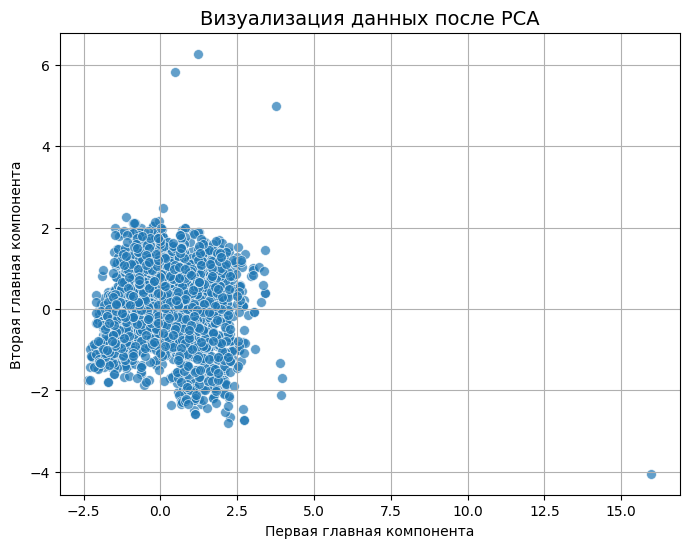

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Загружаем данные
data = pd.read_csv("..//..//static//csv//marketing_campaign.csv", sep="\t")


# Фильтрация и выбор нужных столбцов
data['Age'] = 2024 - data['Year_Birth'] 
data['Total_Spending'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
                           data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'])
data = data[['Age', 'Income', 'Total_Spending']].dropna()

# Стандартизация данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Применение PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Создание DataFrame с результатами PCA
pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=50, alpha=0.7)
plt.title('Визуализация данных после PCA', fontsize=14)
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid(True)
plt.show()


<b>3. Выполнить выбор количества кластеров </b><br><br>

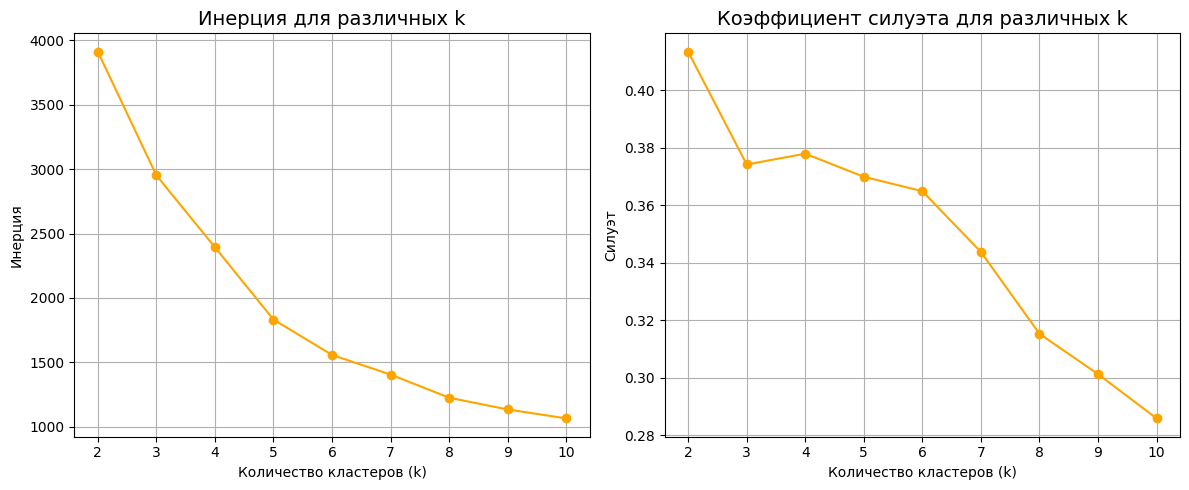

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Выбираем признаки для кластеризации
features = data[['Age', 'Income', 'Total_Spending']].dropna()

# Стандартизация данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Списки для хранения метрик
inertia = []
silhouette_scores = []

# Оценка для числа кластеров от 2 до 10
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, labels))

# Визуализация инерции
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o', color='orange')
plt.title('Инерция для различных k', fontsize=14)
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.grid(True)

# Визуализация коэффициента силуэта
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Коэффициент силуэта для различных k', fontsize=14)
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Силуэт')
plt.grid(True)

plt.tight_layout()
plt.show()


По графику инерции оптимальное значение находится около k = 3 (точка изгиба "локтя"). <br><br>
Коэффициент силуэта также максимален при k = 2, но при k = 3 он все еще достаточно высокий. Выбираем k = 3 для баланса.

<b>4. Выполнить кластерный анализ с применением иерархического и неиерархического алгоритма кластеризации.</b>

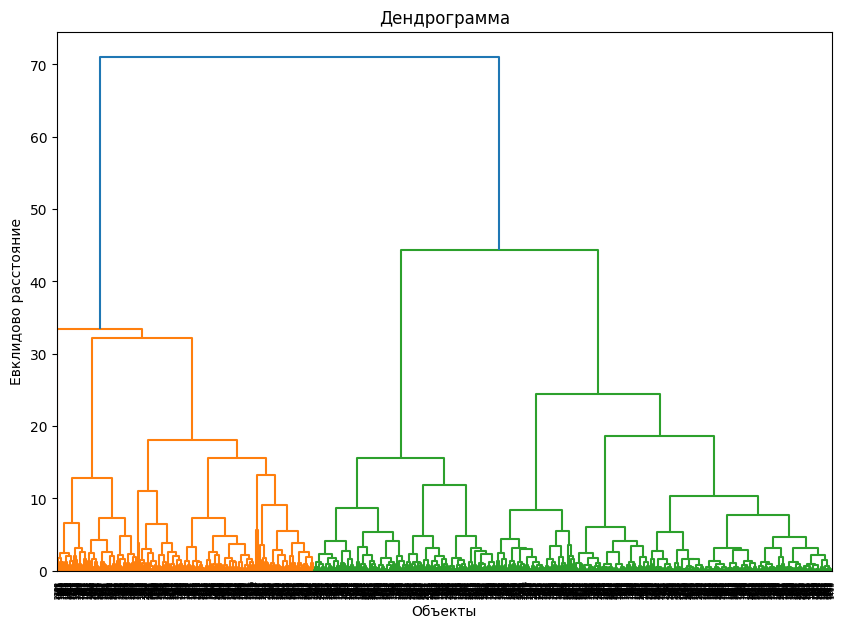

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Выполняем агломеративную кластеризацию иерархически
linkage_matrix = linkage(features_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Дендрограмма')
plt.xlabel('Объекты')
plt.ylabel('Евклидово расстояние')
plt.show()
hierarchical = AgglomerativeClustering(n_clusters=3)
data['Cluster_Hierarchical'] = hierarchical.fit_predict(features_scaled)


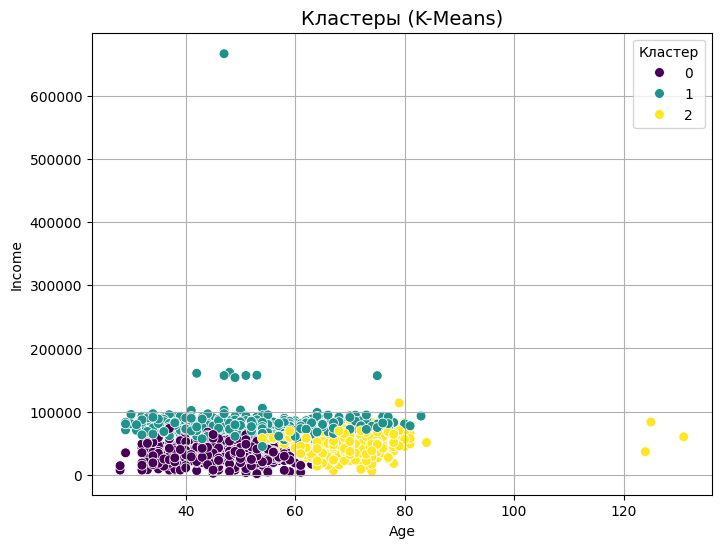

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(features_scaled)

# Визуализация кластеров неиерархически
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', hue='Cluster_KMeans', data=data, palette='viridis', s=50)
plt.title('Кластеры (K-Means)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()


<b>5. Оценить качество решения </b>

In [11]:
silhouette_kmeans = silhouette_score(features_scaled, data['Cluster_KMeans'])

silhouette_hierarchical = silhouette_score(features_scaled, data['Cluster_Hierarchical'])

print(f"Коэффициент силуэта (K-Means): {silhouette_kmeans:.3f}")
print(f"Коэффициент силуэта (Иерархическая кластеризация): {silhouette_hierarchical:.3f}")


Коэффициент силуэта (K-Means): 0.374
Коэффициент силуэта (Иерархическая кластеризация): 0.339
